In [3]:
import pandas as pd
import numpy as np
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], 
                names=['cloth', 'size']) #创建多层索引

ser_obj = pd.Series(np.random.randn(12),index=index1)
df_obj=ser_obj.unstack(0) #第0层索引（cloth） 展开为列，第二层索引（size）保留为行索引
print(df_obj)
#计算最小值有空值如何处理
df_obj.loc[0,'b']=np.nan
print(df_obj)
print('-'*50)
print(df_obj.min(axis=0)) #对每一列求最小值

cloth         a         b         c         d
size                                         
0     -0.865964 -1.284510 -0.056657 -0.452186
1      1.338598 -1.277068 -0.233104  0.606270
2     -0.182217  0.811151 -1.435331  0.640954
cloth         a         b         c         d
size                                         
0     -0.865964       NaN -0.056657 -0.452186
1      1.338598 -1.277068 -0.233104  0.606270
2     -0.182217  0.811151 -1.435331  0.640954
--------------------------------------------------
cloth
a   -0.865964
b   -1.277068
c   -1.435331
d   -0.452186
dtype: float64


In [4]:
df_obj

cloth,a,b,c,d
size,,,,
0,-0.865964,NaN,-0.056657,-0.452186
1,1.338598,-1.277068,-0.233104,0.606270
2,-0.182217,0.811151,-1.435331,0.640954


In [6]:
#观察数据分布的一种非常常用的方法
print(df_obj.describe())
#输出非缺失值的个数、平均值、标准差、最小值、25%分位数、50%分位数、75%分位数、最大值

cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean   0.096806 -0.232959 -0.575031  0.265013
std    1.128456  1.476594  0.750247  0.621354
min   -0.865964 -1.277068 -1.435331 -0.452186
25%   -0.524090 -0.755013 -0.834218  0.077042
50%   -0.182217 -0.232959 -0.233104  0.606270
75%    0.578191  0.289096 -0.144881  0.623612
max    1.338598  0.811151 -0.056657  0.640954


In [7]:
df_obj.loc[:,'c'] #得到第c列的数据

size
0   -0.056657
1   -0.233104
2   -1.435331
Name: c, dtype: float64

In [15]:
#计算最小值或者最大值的索引的位置
print(df_obj.loc[:,'c'].argmin()) # argmin 和 argmax 只能是 series ，不能是 df，返回的是行索引
print(df_obj.loc[:,'a'].argmax()) #同样返回的是行索引

2
1


In [16]:
df_obj

cloth,a,b,c,d
size,,,,
0,-0.865964,NaN,-0.056657,-0.452186
1,1.338598,-1.277068,-0.233104,0.606270
2,-0.182217,0.811151,-1.435331,0.640954


In [18]:
#返回的是一个series
#计算最小值或者最大值的索引值
"""
idxmin()和idxmax()函数
    作用：返回指定轴上最小值所在索引标签
    axis:如果 axis=1，则对每一行计算最小值，返回该最小值所在的列标签；
         如果 axis=0，则对每一列计算最小值，返回该最小值所在的行标签。
    skipna: 计算时是否忽略缺失值 NaN。默认为 True，即忽略 NaN，只考虑有效数值；
            若设为 False，则一旦某列存在 NaN，该列的结果直接返回 NaN
"""
df_obj.idxmin(axis=0, skipna=True) 

cloth
a    0
b    1
c    2
d    0
dtype: int64

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) #不加路径默认当前路径
# 打印数据信息
print(df.info()) #打印 DataFrame 的摘要信息,包括行数、列数、各列名称、非空值数量、数据类型（dtype）、内存使用情况等（不显示具体数据）
print('-'*50)
df.head() #显示 DataFrame 的前 n 行数据（默认 n=5），输出一个表格，展示实际的数据行，包含所有列的值

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   str    
 2   Genre               1000 non-null   str    
 3   Description         1000 non-null   str    
 4   Director            1000 non-null   str    
 5   Actors              1000 non-null   str    
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), str(5)
memory usage: 93.9 KB
None
--------------------------------------------------


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [20]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### 任务：统计这1000部电影有多少导演和演员

In [22]:
# # 获取平均评分
print(df["Rating"].mean())
print('-'*50)
# 导演的人数
"""
以下两种方式都可以，但是更推荐使用第二种，以下是两种方式的对比：
    特性	            len(set(df["Director"].tolist()))	len(df["Director"].unique())
    去重能力	                ✅ 正确	                            ✅ 正确
    执行效率	           低（Python 层面循环）	                    高（C 级别优化）
    内存开销	           高（创建临时列表和 set）	                低（直接操作数组）
    代码可读性	                一般	                               更直观
    数据类型保持	                丢失	                               保持
"""
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique())) #推荐这种方式，效率更高，在处理大数据时更有优势

6.723199999999999
--------------------------------------------------
644
644


In [23]:
# # 获取演员的人数 #二维列表
temp_actors_list = df["Actors"].str.split(", ").tolist()
print(temp_actors_list)

[['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana'], ['Noomi Rapace', 'Logan Marshall-Green', 'Michael Fassbender', 'Charlize Theron'], ['James McAvoy', 'Anya Taylor-Joy', 'Haley Lu Richardson', 'Jessica Sula'], ['Matthew McConaughey,Reese Witherspoon', 'Seth MacFarlane', 'Scarlett Johansson'], ['Will Smith', 'Jared Leto', 'Margot Robbie', 'Viola Davis'], ['Matt Damon', 'Tian Jing', 'Willem Dafoe', 'Andy Lau'], ['Ryan Gosling', 'Emma Stone', 'Rosemarie DeWitt', 'J.K. Simmons'], ['Essie Davis', 'Andrea Riseborough', 'Julian Barratt,Kenneth Branagh'], ['Charlie Hunnam', 'Robert Pattinson', 'Sienna Miller', 'Tom Holland'], ['Jennifer Lawrence', 'Chris Pratt', 'Michael Sheen,Laurence Fishburne'], ['Eddie Redmayne', 'Katherine Waterston', 'Alison Sudol,Dan Fogler'], ['Taraji P. Henson', 'Octavia Spencer', 'Janelle Monáe,Kevin Costner'], ['Felicity Jones', 'Diego Luna', 'Alan Tudyk', 'Donnie Yen'], ["Auli'i Cravalho", 'Dwayne Johnson', 'Rachel House', 'Temuera Morrison'], ['Anne 

In [24]:
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
actors_num = len(set(actors_list)) #set去重
print(actors_num) #演员的数量

2015


In [26]:
#想知道每个演员出演的电影数量
"""
np.unique() 函数获取一个数组（或列表）中排序后的唯一值，加上 return_counts 参数，会同时返回每个唯一值出现的次数
    u 接收唯一值数组（排序后），例如所有不重复的演员名。
    indices 接收计数数组，与 u 一一对应，表示每个唯一值在原始 actors_list 中出现的次数。
"""
u,indices = np.unique(actors_list,return_counts = True)
print (u)
indices

['50 Cent' 'A.C. Peterson' 'AJ Michalka' ... 'Émilie Leclerc'
 'Ólafur Darri Ólafsson' 'Óscar Jaenada']


array([1, 1, 1, ..., 1, 1, 1], shape=(2015,))

### 8.3.1 电影时长的关系

66 191
125
--------------------------------------------------


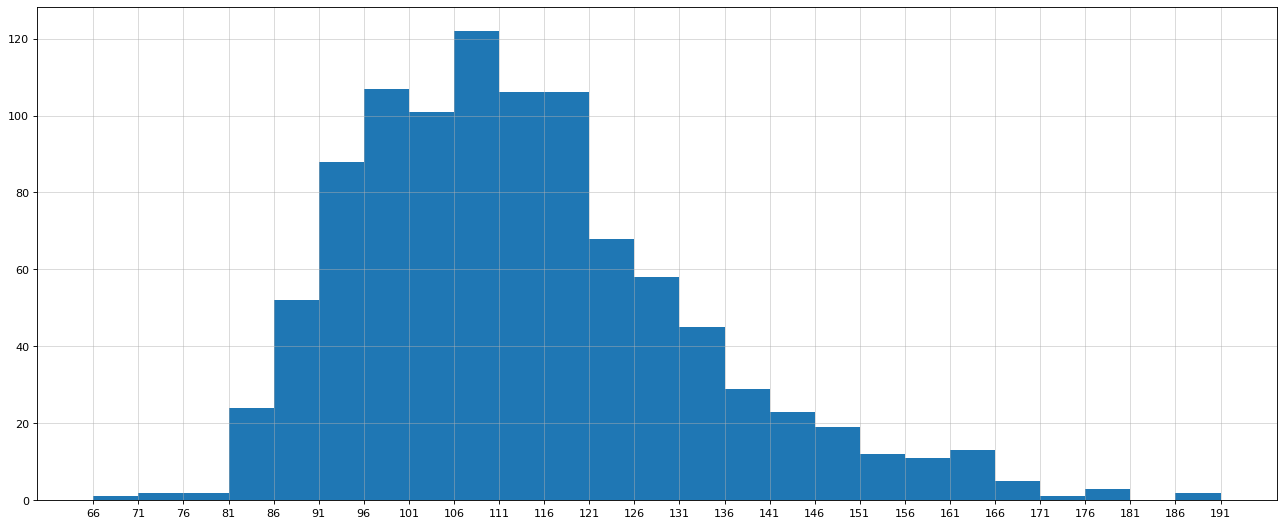

In [28]:
# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print(min_runtime,max_runtime)
# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5) #alpha是透明度
#range第三个参数是步长
plt.xticks(range(min_runtime, max_runtime + 5,5))

plt.show()

In [29]:
#电影评分的分布情况
# 获取平均评分
print(df["Rating"].mean())

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values
print(type(runtime_data))
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print('-'*50)
print(max_runtime,min_runtime) #最大值最小值电影评分

6.723199999999999
<class 'numpy.ndarray'>
--------------------------------------------------
9.0 1.9


最大评分减去最小评分为7.1
组数为14.0


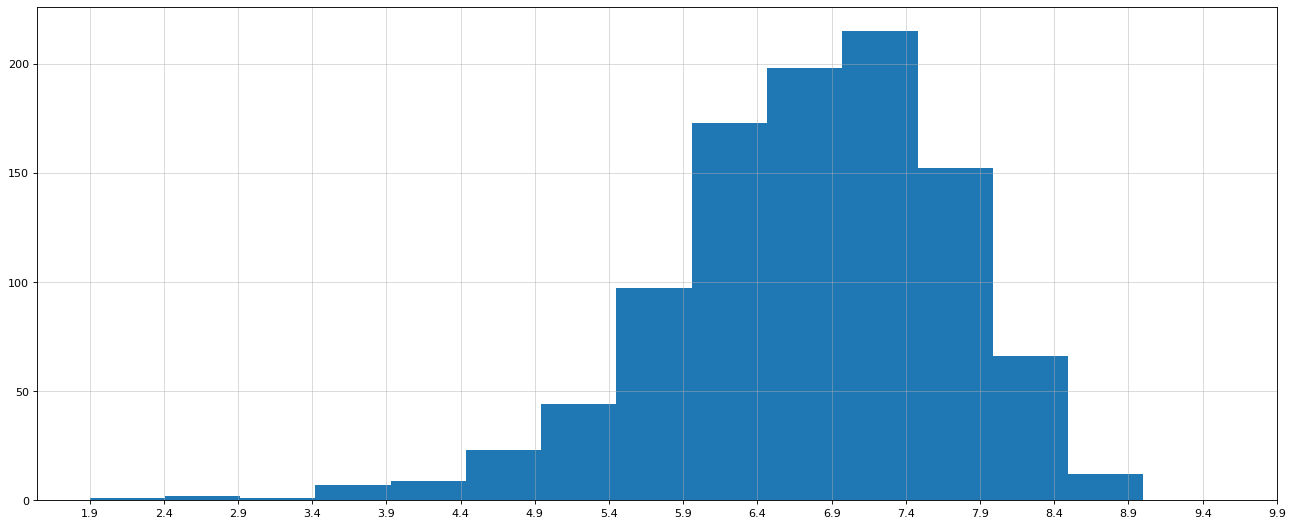

In [18]:
# 计算组数
print(f'最大评分减去最小评分为{max_runtime - min_runtime}')
num_bin = (max_runtime - min_runtime) // 0.5  #对不齐的原因是:9.0-1.9不能整除0.5,(9.0-1.9)/0.5=14.2,不是整数

print(f'组数为{num_bin}')
# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5)
#因为range的步长不支持0.5,自己做一个列表
_x = [min_runtime]
i = min_runtime
while i <= max_runtime + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x) #设置x轴的刻度

plt.show()

组数为15


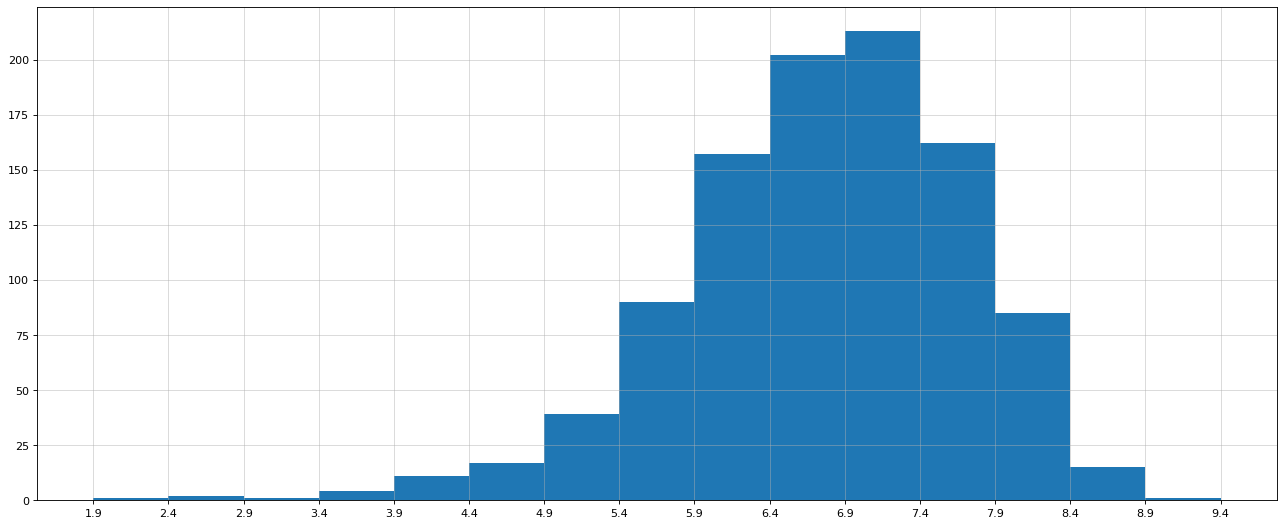

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 假设已有 runtime_data
min_runtime = 1.9           # 用户指定的起始值
max_runtime = max(runtime_data)  # 实际最大值，例如 9.0

# 生成 bin 边界：从 1.9 开始，步长 0.5，直到覆盖 max_runtime（并多一个边界）
# 加一个微小量（如 0.001）避免浮点误差导致最后一个边界不足
bins = np.arange(min_runtime, max_runtime + 0.5 + 0.001, 0.5)

# 组数 = 边界数 - 1
num_bin = len(bins) - 1
print(f'组数为{num_bin}')

plt.figure(figsize=(20, 8), dpi=80)
# 使用自定义 bins 绘制直方图
plt.hist(runtime_data, bins=bins)
plt.grid(alpha=0.5)

# 设置 x 轴刻度为 bin 边界（网格线自然就在这些位置）
plt.xticks(bins)
plt.show()

### 8.3.3 导演要拍什么题材电影

In [32]:
print(df["Genre"].head(3))  #看前几条数据，掌握格式，内容类型

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: str


In [35]:
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
# 二维变为一维
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list)) # 20个题材类型
# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码，
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
#df.shape[0] 获取 DataFrame 的行数（即电影样本数）
print(zeros_df)

20
     Action  Sci-Fi  Drama  Adventure  Western  War  History  Mystery  Horror  \
0       0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
1       0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
2       0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
3       0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
4       0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
..      ...     ...    ...        ...      ...  ...      ...      ...     ...   
995     0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
996     0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
997     0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
998     0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   
999     0.0     0.0    0.0        0.0      0.0  0.0      0.0      0.0     0.0   

     Crime  Biography  M

In [36]:
# 在创建的零矩阵中，给每个电影出现分类的位置赋值为 1,one-hot的中文是独热码
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    #temp_list是二维列表，temp_list[i]是一个一维列表
    zeros_df.loc[i, temp_list[i]] = 1 #temp_list[i]是一个列表，里面是分类

zeros_df.head(3)

,Action,Sci-Fi,Drama,Adventure,Western,War,History,Mystery,Horror,Crime,Biography,Musical,Music,Family,Animation,Romance,Fantasy,Sport,Thriller,Comedy
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)

Action       303.0
Sci-Fi       120.0
Drama        513.0
Adventure    259.0
Western        7.0
War           13.0
History       29.0
Mystery      106.0
Horror       119.0
Crime        150.0
Biography     81.0
Musical        5.0
Music         16.0
Family        51.0
Animation     49.0
Romance      141.0
Fantasy      101.0
Sport         18.0
Thriller     195.0
Comedy       279.0
dtype: float64


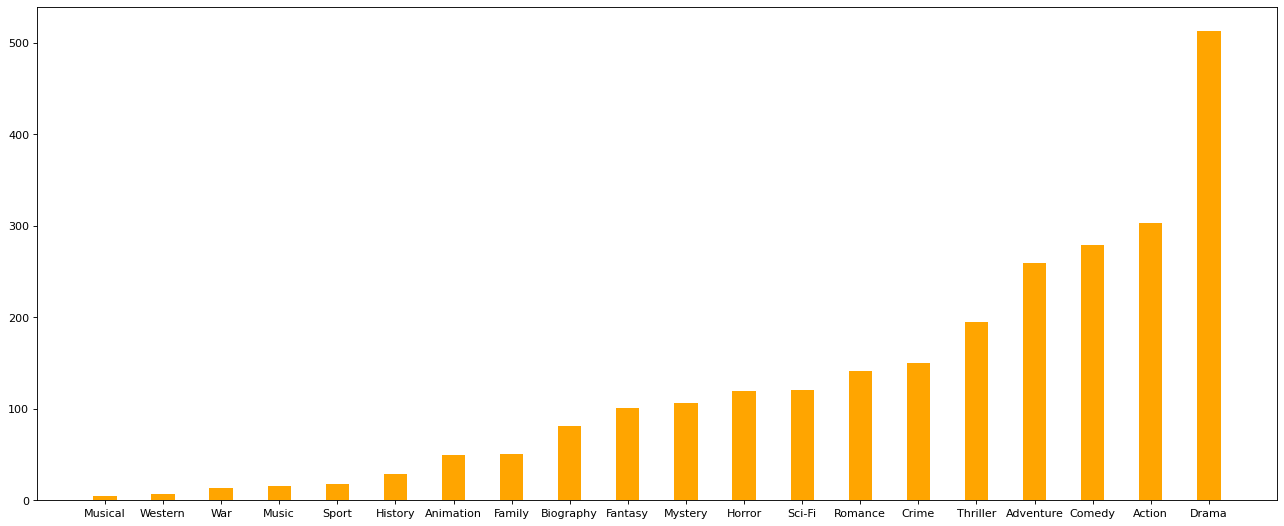

In [38]:
# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()